In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import util_michael as util_m
from util import *

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

### Combine train and test data for cleaning

In [4]:
comb = pd.concat([train, test], ignore_index=True, sort=False)
comb = util_m.convert_objects_to_categories(comb)
# combcopy = comb.copy()
comb.shape

(2919, 81)

In [5]:
comb.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Check missing values by feature

In [6]:
nas = summary_missing_data(comb)
nas

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


# Fill missing values with "NA" or use ML when NA is not possible
## Start from bottom up

### Exterior1st and Exterior2nd

- See all features that involve **Exterior**

In [7]:
target = 'Exterior1st'
cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']
comb[ comb[target].isna() ][cols]

,Neighborhood,Exterior1st,Exterior2nd,ExterQual,ExterCond
2151,Edwards,NaN,NaN,TA,TA


- It's only 1 house that doesn't have the **Exterior1st** and **Exterior2nd** data 
- One option could be to input an **NA**, but that option doesn't exist for that feature
- So let's input it using ML
    - See below for prediction accuracy for each feature

In [8]:
util_m.replace_missing_with_ml(comb, target)

Successfully trained model to predict: Exterior1st
------Evaluation-------
ACC         :  0.5863


In [9]:
util_m.replace_missing_with_ml(comb, 'Exterior2nd')

Successfully trained model to predict: Exterior2nd
------Evaluation-------
ACC         :  0.9233


In [10]:
nas_up = summary_missing_data(comb)
print('Exterior1st' in list(nas_up.index), 'Exterior2nd' in list(nas_up.index))

False False


### SaleType

In [11]:
target = 'SaleType'
cols = [target, 'SaleCondition', 'SalePrice']
comb[ comb[target].isna() ][cols]

,SaleType,SaleCondition,SalePrice
2489,NaN,Normal,NaN


- It's only 1 house to be filled with **SaleType**
- Has no **NA** option
- Use ML
    - See accuracy below

In [12]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: SaleType
------Evaluation-------
ACC         :  0.9438
False


### Kitchen

In [13]:
target = 'KitchenQual'
cols = ['Neighborhood', 'KitchenQual', 'KitchenAbvGr', 'Functional', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,KitchenQual,KitchenAbvGr,Functional,SalePrice
1555,ClearCr,NaN,1,Mod,NaN


- Only 1 house to be filled with **KitchenQual**
- Has no **NA** option
- Use ML
    - See accuracy

In [14]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: KitchenQual
------Evaluation-------
ACC         :  0.7849
False


### Electrical

In [15]:
target = 'Electrical'
cols = ['Neighborhood', 'Electrical', 'Functional', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,Electrical,Functional,SalePrice
1379,Timber,NaN,Typ,167500.0


- Only 1 house to be filled with **Electrical**
- Has no **NA** option
- Use ML
    - See accuracy

In [16]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: Electrical
------Evaluation-------
ACC         :  0.889
False


### Functional ~ Home functionality (Assume typical unless deductions are warranted)

In [17]:
target = 'Functional'
cols = ['Neighborhood', target, 'Electrical', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,Functional,Electrical,OverallCond,OverallQual,YearBuilt,SalePrice
2216,IDOTRR,NaN,FuseA,5,1,1952,NaN
2473,IDOTRR,NaN,SBrkr,1,4,1910,NaN


- Only 2 house to be filled with **Functional**
- Has no **NA** option
- Use ML
    - See accuracy

In [18]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: Functional
------Evaluation-------
ACC         :  0.9329
False


### Utilities ~ Type of utilities available

In [19]:
target = 'Utilities'
cols = ['Neighborhood', target, 'Electrical', 'Functional', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,Utilities,Electrical,Functional,OverallCond,OverallQual,YearBuilt,SalePrice
1915,IDOTRR,NaN,FuseA,Min1,4,2,1910,NaN
1945,Gilbert,NaN,FuseA,Min2,2,6,1952,NaN


- Only 2 house to be filled with **Utilities**
- Has no **NA** option
- Use ML
    - See accuracy

In [20]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: Utilities
------Evaluation-------
ACC         :  1.0
False


### MSZoning ~ Identifies the general zoning classification of the sale.

In [21]:
target = 'MSZoning'
cols = ['Neighborhood', target, 'MSSubClass', 'Electrical', 'Functional', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,MSZoning,MSSubClass,Electrical,Functional,OverallCond,OverallQual,YearBuilt,SalePrice
1915,IDOTRR,NaN,30,FuseA,Min1,4,2,1910,NaN
2216,IDOTRR,NaN,20,FuseA,Typ,5,1,1952,NaN
2250,IDOTRR,NaN,70,SBrkr,Maj1,1,5,1900,NaN
2904,Mitchel,NaN,20,FuseA,Mod,3,1,1951,NaN


- Only 4 house to be filled with **MSZoning**
- Has no **NA** option
- Use ML
    - See accuracy

In [22]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: MSZoning
------Evaluation-------
ACC         :  0.963
False


## What's left to clean?

In [23]:
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


### Go thru

- Garage
- Basement
- Masonry

### then
- LotFrontage
- FirePlace
- Fence
- Alley
- MiscFeature
- PoolQC

### GarageArea & GarageCars
(missing value comes from the same instance)

In [24]:
target = 'GarageArea'
cols = ['Neighborhood', target, 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
2576,IDOTRR,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,0,NaN


- **Instance 2576** seems to have a **GarageType** input error
- All other instances with **GarageType == Detchd** do have meaningful information about the garage (see table below), except instance **2576**

- Fill all Garage information on instance 2576 with **NA** (No Garage)

In [25]:
comb[ comb['GarageType'] == 'Detchd' ][cols].sample(10)

,Neighborhood,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
2388,NAmes,396.0,Detchd,1966.0,Unf,2.0,396.0,TA,TA,Y,NaN,0,NaN
2484,Sawyer,315.0,Detchd,1966.0,Unf,1.0,315.0,TA,TA,Y,NaN,0,NaN
2035,Somerst,480.0,Detchd,1999.0,Unf,2.0,480.0,TA,TA,Y,NaN,0,NaN
149,BrkSide,240.0,Detchd,1936.0,Unf,1.0,240.0,Fa,TA,Y,NaN,0,115000.0
2524,CollgCr,576.0,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,NaN,0,NaN
508,OldTown,360.0,Detchd,1928.0,Unf,2.0,360.0,TA,TA,N,NaN,0,161000.0
79,OldTown,440.0,Detchd,1966.0,Unf,2.0,440.0,TA,TA,Y,NaN,0,110000.0
297,Somerst,576.0,Detchd,1997.0,RFn,2.0,576.0,TA,TA,Y,NaN,0,239000.0
852,Crawfor,240.0,Detchd,1941.0,Unf,1.0,240.0,TA,TA,Y,NaN,0,164000.0
995,BrkSide,305.0,Detchd,1946.0,Unf,1.0,305.0,TA,TA,Y,NaN,0,121600.0


In [26]:
ix = 2576
comb['GarageType'] = comb['GarageType'].cat.add_categories(['NA'])
comb.at[ix, 'GarageType'] = 'NA'
comb['GarageFinish'] = comb['GarageFinish'].cat.add_categories(['NA'])
comb.at[ix, 'GarageFinish'] = 'NA'
comb.at[ix, 'GarageCars'] = 0
comb.at[ix, 'GarageArea'] = 0
comb['GarageQual'] = comb['GarageQual'].cat.add_categories(['NA'])
comb.at[ix, 'GarageQual'] = 'NA'
comb['GarageCond'] = comb['GarageCond'].cat.add_categories(['NA'])
comb.at[ix, 'GarageCond'] = 'NA'

### GarageType

In [27]:
target = 'GarageType'
cols = ['Neighborhood', target, 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp.sample(15)

,Neighborhood,GarageType,GarageArea,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
1839,Edwards,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,NaN
393,BrkSide,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,100000.0
1811,OldTown,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,NaN
2193,Edwards,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,NaN
434,MeadowV,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,81000.0
386,Edwards,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,81000.0
2891,IDOTRR,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,NaN
1449,MeadowV,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Y,NaN,0,92000.0
2426,OldTown,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,NaN
108,IDOTRR,NaN,0.0,NaN,NaN,0.0,NaN,NaN,N,NaN,0,115000.0


In [28]:
temp[ temp['GarageArea'] > 0]

,Neighborhood,GarageType,GarageArea,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice


- These are 157 instances that **DO NOT HAVE A GARAGE**
- Input all of them with **NA**

In [29]:
for ix in list(temp.index):
    comb.at[ix, 'GarageType'] = 'NA'
    comb.at[ix, 'GarageFinish'] = 'NA'
    comb.at[ix, 'GarageCars'] = 0
    comb.at[ix, 'GarageArea'] = 0
    comb.at[ix, 'GarageQual'] = 'NA'
    comb.at[ix, 'GarageCond'] = 'NA'

### GarageQual, GarageFinish and GarageCond	

In [30]:
target = 'GarageQual'
cols = ['Neighborhood', target, 'GarageType', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,GarageQual,GarageType,GarageArea,GarageYrBlt,GarageFinish,GarageCars,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
2126,OldTown,NaN,Detchd,360.0,NaN,NaN,1.0,NaN,Y,Shed,1000,NaN


- This one instance **HAVE** a garage but doesn't have the information
- Use ML to input the values

In [31]:
util_m.replace_missing_with_ml(comb, target)
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: GarageQual
------Evaluation-------
ACC         :  0.9301
False


In [32]:
util_m.replace_missing_with_ml(comb, 'GarageFinish')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: GarageFinish
------Evaluation-------
ACC         :  0.7192
False


In [33]:
util_m.replace_missing_with_ml(comb, 'GarageCond')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: GarageCond
------Evaluation-------
ACC         :  0.9562
False


### GarageYrBlt

- How should we deal with empty **GarageYrBlt** when there is **NO GARAGE**?


- Fill with **YearBuilt**

In [34]:
comb[ comb['GarageYrBlt'].isna() ][['Neighborhood', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SalePrice']].sample(10)

,Neighborhood,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MiscFeature,MiscVal,SalePrice
1131,Mitchel,NA,NaN,NA,0.0,0.0,NA,NA,Y,NaN,0,93500.0
1218,BrkSide,NA,NaN,NA,0.0,0.0,NA,NA,N,NaN,0,80500.0
638,Edwards,NA,NaN,NA,0.0,0.0,NA,NA,P,NaN,0,85000.0
287,NAmes,NA,NaN,NA,0.0,0.0,NA,NA,Y,NaN,0,88000.0
127,OldTown,NA,NaN,NA,0.0,0.0,NA,NA,N,NaN,0,87000.0
2246,MeadowV,NA,NaN,NA,0.0,0.0,NA,NA,Y,NaN,0,NaN
2693,SawyerW,NA,NaN,NA,0.0,0.0,NA,NA,Y,NaN,0,NaN
636,BrkSide,NA,NaN,NA,0.0,0.0,NA,NA,N,NaN,0,60000.0
165,Edwards,NA,NaN,NA,0.0,0.0,NA,NA,Y,NaN,0,127500.0
1819,OldTown,NA,NaN,NA,0.0,0.0,NA,NA,N,NaN,0,NaN


In [35]:
comb.loc[comb['GarageYrBlt'].isnull(),'GarageYrBlt'] = comb.loc[comb['GarageYrBlt'].isnull(), 'YearBuilt']

In [36]:
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
BsmtExposure,82,0.028092
BsmtCond,82,0.028092


### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF and TotalBsmtSF

In [37]:
target = 'BsmtFinSF1'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'MiscFeature', 'MiscVal', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,BsmtFinSF1,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinType1,BsmtFinType2,BsmtFinSF2,MiscFeature,MiscVal,SalePrice
2120,BrkSide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


- Instance **2120** has **NO BASEMENT**
- Input **NA**

In [38]:
ix = 2120
comb['BsmtFinType1'] = comb['BsmtFinType1'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtFinType1'] = 'NA'
comb.at[ix, 'BsmtFinSF1'] = 0
comb['BsmtFinType2'] = comb['BsmtFinType2'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtFinType2'] = 'NA'
comb.at[ix, 'BsmtFinSF2'] = 0
comb.at[ix, 'BsmtUnfSF'] = 0
comb.at[ix, 'TotalBsmtSF'] = 0
comb['BsmtQual'] = comb['BsmtQual'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtQual'] = 'NA'
comb['BsmtCond'] = comb['BsmtCond'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtCond'] = 'NA'
comb['BsmtExposure'] = comb['BsmtExposure'].cat.add_categories(['NA'])
comb.at[ix, 'BsmtExposure'] = 'NA'
comb.at[ix, 'BsmtFullBath'] = 0
comb.at[ix, 'BsmtHalfBath'] = 0

In [39]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
BsmtExposure,81,0.027749
BsmtCond,81,0.027749
BsmtQual,80,0.027407


### BsmtHalfBath and BsmtFullBath

In [40]:
target = 'BsmtHalfBath'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
comb[ comb[target].isna() ][cols]

,Neighborhood,BsmtHalfBath,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
2188,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN


- Instance **2188** has **NO BASEMENT**
- Input **NA**

In [41]:
ix = 2188
comb.at[ix, 'BsmtFinType1'] = 'NA'
comb.at[ix, 'BsmtFinSF1'] = 0
comb.at[ix, 'BsmtFinType2'] = 'NA'
comb.at[ix, 'BsmtFinSF2'] = 0
comb.at[ix, 'BsmtUnfSF'] = 0
comb.at[ix, 'TotalBsmtSF'] = 0
comb.at[ix, 'BsmtQual'] = 'NA'
comb.at[ix, 'BsmtCond'] = 'NA'
comb.at[ix, 'BsmtExposure'] = 'NA'
comb.at[ix, 'BsmtFullBath'] = 0
comb.at[ix, 'BsmtHalfBath'] = 0

In [42]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
BsmtCond,80,0.027407
BsmtExposure,80,0.027407
BsmtQual,79,0.027064


### BsmtFinType1

In [43]:
target = 'BsmtFinType1'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtFinType1,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
17,Sawyer,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,Shed,500,90000.0
39,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,82000.0
90,NAmes,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,109900.0
102,SawyerW,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,118964.0
156,NAmes,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,109500.0
182,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,120000.0
259,OldTown,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,97000.0
342,NAmes,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,87500.0
362,Edwards,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,198500.0
371,ClearCr,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,134432.0


- These are 77 instances that **DO NOT HAVE A BASEMENT**
- Input all of them with **NA**

In [44]:
for ix in list(temp.index):
    comb.at[ix, 'BsmtFinType1'] = 'NA'
    comb.at[ix, 'BsmtFinSF1'] = 0
    comb.at[ix, 'BsmtFinType2'] = 'NA'
    comb.at[ix, 'BsmtFinSF2'] = 0
    comb.at[ix, 'BsmtUnfSF'] = 0
    comb.at[ix, 'TotalBsmtSF'] = 0
    comb.at[ix, 'BsmtQual'] = 'NA'
    comb.at[ix, 'BsmtCond'] = 'NA'
    comb.at[ix, 'BsmtExposure'] = 'NA'
    comb.at[ix, 'BsmtFullBath'] = 0
    comb.at[ix, 'BsmtHalfBath'] = 0

In [45]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
MasVnrType,24,0.008222
MasVnrArea,23,0.007879
BsmtExposure,3,0.001028


### BsmtFinType2

In [46]:
target = 'BsmtFinType2'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtFinType2,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
332,NridgHt,NaN,3206.0,1603.0,Gd,TA,No,1.0,0.0,1124.0,GLQ,479.0,NaN,NaN,0,284000.0


- This instance **BsmtFinType2** value is probably a data entry error since there is a **BsmtFinSF2**
- Let's use ML to input

In [47]:
util_m.replace_missing_with_ml(comb, 'BsmtFinType2')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtFinType2
------Evaluation-------
ACC         :  0.9082
False


### BsmtQual

In [48]:
target = 'BsmtQual'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtQual,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
2217,IDOTRR,NaN,173.0,173.0,NaN,Fa,No,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN
2218,IDOTRR,NaN,356.0,356.0,NaN,TA,No,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN


- These two instances **DO HAVE** an **Unfinished** basement
- The quality **BsmtQual** has not been inputted, probably another data entry error
- Do ML to input

In [49]:
util_m.replace_missing_with_ml(comb, 'BsmtQual')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtQual
------Evaluation-------
ACC         :  0.8479
False


### BsmtCond

In [50]:
target = 'BsmtCond'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtCond,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
2040,Veenker,NaN,1426.0,0.0,Gd,NaN,Mn,1.0,0.0,1044.0,GLQ,382.0,Rec,NaN,0,NaN
2185,Edwards,NaN,1127.0,94.0,TA,NaN,No,0.0,1.0,1033.0,BLQ,0.0,Unf,NaN,0,NaN
2524,CollgCr,NaN,995.0,240.0,TA,NaN,Av,0.0,0.0,755.0,ALQ,0.0,Unf,NaN,0,NaN


**Same as the last one**
- These three instances **DO HAVE** a basement
- The conditions of the basement **BsmtCond** has not been inputted, probably another data entry error
- Do ML to input

In [51]:
util_m.replace_missing_with_ml(comb, 'BsmtCond')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtCond
------Evaluation-------
ACC         :  0.9026
False


### BsmtExposure

In [52]:
target = 'BsmtExposure'
cols = ['Neighborhood', target, 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,BsmtExposure,TotalBsmtSF,BsmtUnfSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinType1,BsmtFinSF2,BsmtFinType2,MiscFeature,MiscVal,SalePrice
948,CollgCr,NaN,936.0,936.0,Gd,TA,NaN,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,192500.0
1487,Somerst,NaN,1595.0,1595.0,Gd,TA,NaN,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN
2348,Somerst,NaN,725.0,725.0,Gd,TA,NaN,0.0,0.0,0.0,Unf,0.0,Unf,NaN,0,NaN


**Same as the last one**
- These three instances **DO HAVE** a basement
- The exposure of the basement **BsmtExposure** has not been inputted, probably another data entry error
- Do ML to input

In [53]:
util_m.replace_missing_with_ml(comb, 'BsmtExposure')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: BsmtExposure
------Evaluation-------
ACC         :  0.7627
False


In [54]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
MasVnrType,24,0.008222
MasVnrArea,23,0.007879


### MasVnrArea

In [55]:
target = 'MasVnrArea'
cols = ['Neighborhood', target, 'MasVnrType', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,MasVnrArea,MasVnrType,MiscFeature,MiscVal,SalePrice
234,Gilbert,NaN,NaN,NaN,0,216500.0
529,Crawfor,NaN,NaN,NaN,0,200624.0
650,Somerst,NaN,NaN,NaN,0,205950.0
936,SawyerW,NaN,NaN,NaN,0,184900.0
973,Somerst,NaN,NaN,NaN,0,182000.0
977,Somerst,NaN,NaN,NaN,0,199900.0
1243,NridgHt,NaN,NaN,NaN,0,465000.0
1278,CollgCr,NaN,NaN,NaN,0,237000.0
1691,Gilbert,NaN,NaN,NaN,0,NaN
1706,Somerst,NaN,NaN,NaN,0,NaN


- We will treat this instances as having **NO MASONRY**
- Input **None** for type and **0** for area

In [56]:
# comb['MasVnrType'] = comb['MasVnrType'].cat.add_categories(['None'])
for ix in list(temp.index):
    comb.at[ix, 'MasVnrType'] = 'None'
    comb.at[ix, 'MasVnrArea'] = 0

In [57]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
MasVnrType,1,0.000343


### MasVnrType

In [58]:
target = 'MasVnrType'
cols = ['Neighborhood', target, 'MasVnrArea', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp

,Neighborhood,MasVnrType,MasVnrArea,MiscFeature,MiscVal,SalePrice
2610,Mitchel,NaN,198.0,NaN,0,NaN


- This instance **DO HAVE** a masonry with 198 square feets
- Use ML to input the type

In [59]:
util_m.replace_missing_with_ml(comb, 'MasVnrType')
nas_up = summary_missing_data(comb)
print(target in list(nas_up.index))

Successfully trained model to predict: MasVnrType
------Evaluation-------
ACC         :  0.9479
False


In [60]:
nas_up = summary_missing_data(comb)
nas_up

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495


### LotFrontage ~ Linear feet of street connected to property

In [61]:
target = 'LotFrontage'
cols = ['Neighborhood', target, 'Street', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp.shape

(486, 4)

In [62]:
temp.sample(10)

,Neighborhood,LotFrontage,Street,SalePrice
147,Gilbert,NaN,Pave,222500.0
845,Sawyer,NaN,Pave,171000.0
709,Sawyer,NaN,Pave,109900.0
490,MeadowV,NaN,Pave,115000.0
2173,CollgCr,NaN,Pave,NaN
1862,SawyerW,NaN,Pave,NaN
1847,Sawyer,NaN,Pave,NaN
356,Gilbert,NaN,Pave,173000.0
221,Gilbert,NaN,Pave,200000.0
2146,ClearCr,NaN,Pave,NaN


- We have no clue on how to input the **LotFrontage**
- Let's test a ML to see how good it does

In [63]:
util_m.replace_missing_with_ml(comb.copy(), 'LotFrontage')

Successfully trained model to predict: LotFrontage
------Evaluation-------
R2          :  0.5501
RMSE        :  15.25


In [64]:
comb['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- It's not so good to predict the **LotFrontage** using ML


- See it's correlation with **SalePrice** and distribution

In [65]:
comb.corr().at['LotFrontage', 'SalePrice']

0.35179909657067854

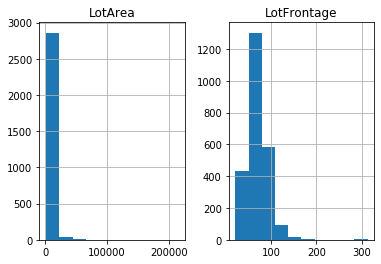

In [66]:
comb[['LotFrontage', 'LotArea']].hist();

- **LotFrontage** and **LotArea** averages by Neighborhood are highly correlated (which makes sense, in neightbourhoods where lots are big, their lot frontage is also big)

In [67]:
comb.groupby('Neighborhood')[['LotFrontage', 'LotArea']].mean().corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.841902
LotArea,0.841902,1.000000


- Let's fill **LotFrontage** by grouping by **Neightbourhood** and 10 bins of **LotArea**, and taking the mean out of each

In [68]:
chk = comb.copy()

In [69]:
chk.groupby(['Neighborhood', pd.qcut(chk['LotArea'], 8)])[['LotFrontage']].mean()

LotFrontage
Neighborhood LotArea                         
Blmngtn      (1299.999, 5686.25]    46.900000
             (5686.25, 7478.0]            NaN
             (7478.0, 8520.0]             NaN
             (8520.0, 9453.0]             NaN
             (9453.0, 10362.25]           NaN
             (10362.25, 11570.0]          NaN
             (11570.0, 13650.0]           NaN
             (13650.0, 215245.0]          NaN
Blueste      (1299.999, 5686.25]    27.300000
             (5686.25, 7478.0]            NaN
             (7478.0, 8520.0]             NaN
             (8520.0, 9453.0]             NaN
             (9453.0, 10362.25]           NaN
             (10362.25, 11570.0]          NaN
             (11570.0, 13650.0]           NaN
             (13650.0, 215245.0]          NaN
BrDale       (1299.999, 5686.25]    21.500000
             (5686.25, 7478.0]            NaN
             (7478.0, 8520.0]             NaN
             (8520.0, 9453.0]             NaN
             (9453.0, 10362.25]           NaN
             (10362.25, 11570.0]          NaN
             (11570.0, 13650.0]           NaN
             (13650.0, 215245.0]          NaN
BrkSide      (1299.999, 5686.25]    51.533333
             (5686.25, 7478.0]      53.967213
             (7478.0, 8520.0]             NaN
             (8520.0, 9453.0]       61.181818
             (9453.0, 10362.25]     57.500000
             (10362.25, 11570.0]    60.000000
...                                       ...
Somerst      (7478.0, 8520.0]       73.666667
             (8520.0, 9453.0]       74.689655
             (9453.0, 10362.25]     78.722222
             (10362.25, 11570.0]    84.500000
             (11570.0, 13650.0]     92.000000
             (13650.0, 215245.0]    61.600000
StoneBr      (1299.999, 5686.25]    39.384615
             (5686.25, 7478.0]      49.750000
             (7478.0, 8520.0]       59.600000
             (8520.0, 9453.0]             NaN
             (9453.0, 10362.25]           NaN
             (10362.25, 11570.0]    78.000000
             (11570.0, 13650.0]     82.000000
             (13650.0, 215245.0]    75.000000
Timber       (1299.999, 5686.25]    44.000000
             (5686.25, 7478.0]            NaN
             (7478.0, 8520.0]       61.666667
             (8520.0, 9453.0]       70.666667
             (9453.0, 10362.25]     70.375000
             (10362.25, 11570.0]    85.400000
             (11570.0, 13650.0]     86.875000
             (13650.0, 215245.0]    88.933333
Veenker      (1299.999, 5686.25]          NaN
             (5686.25, 7478.0]            NaN
             (7478.0, 8520.0]             NaN
             (8520.0, 9453.0]             NaN
             (9453.0, 10362.25]     64.000000
             (10362.25, 11570.0]    48.000000
             (11570.0, 13650.0]     80.000000
             (13650.0, 215245.0]    86.857143

[200 rows x 1 columns]

In [70]:
chk.loc[[42, 2234, 126, 133, 840, 269, 351, 559, 1000, 1500]]['LotFrontage']

42       NaN
2234     NaN
126      NaN
133      NaN
840      NaN
269      NaN
351      NaN
559      NaN
1000    74.0
1500     NaN
Name: LotFrontage, dtype: float64

In [71]:
comb['LotFrontage'] = comb.groupby(['Neighborhood', pd.qcut(comb['LotArea'], 10)])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

- Some couldn't be filled, filled them with just the mean out of the **Neighborhood**

In [72]:
comb[ comb['LotFrontage'].isna() ][['Neighborhood', 'LotArea', 'LotFrontage', 'SalePrice']]

,Neighborhood,LotArea,LotFrontage,SalePrice
126,NPkVill,4928,NaN,128000.0
133,Timber,6853,NaN,220000.0
682,ClearCr,2887,NaN,173000.0
840,SWISU,12155,NaN,140000.0
1431,NPkVill,4928,NaN,143750.0
2234,Timber,7915,NaN,NaN
2594,Timber,6718,NaN,NaN
2596,Timber,7777,NaN,NaN
2818,ClearCr,1700,NaN,NaN


In [73]:
comb['LotFrontage'] = comb.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [74]:
summary_missing_data(comb)

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468


### FireplaceQu

In [75]:
target = 'FireplaceQu'
cols = ['Neighborhood', target, 'Fireplaces', 'MiscFeature', 'MiscVal', 'SalePrice']
temp = comb[ comb[target].isna() ][cols]
temp.shape

(1420, 6)

In [76]:
temp.sample(10)

,Neighborhood,FireplaceQu,Fireplaces,MiscFeature,MiscVal,SalePrice
593,CollgCr,NaN,0,NaN,0,140000.0
1830,OldTown,NaN,0,Shed,400,NaN
1722,SawyerW,NaN,0,NaN,0,NaN
1838,Sawyer,NaN,0,NaN,0,NaN
2697,SawyerW,NaN,0,Othr,3000,NaN
2548,Edwards,NaN,0,NaN,0,NaN
2050,NAmes,NaN,0,NaN,0,NaN
1326,Edwards,NaN,0,NaN,0,79000.0
1556,SWISU,NaN,0,NaN,0,NaN
1090,NAmes,NaN,0,NaN,0,92900.0


- Seems that all of these, **DO NOT** have a fireplace

In [77]:
comb[ (comb['FireplaceQu'].isna()) & (comb['Fireplaces']>0) ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [78]:
comb['FireplaceQu'] = comb['FireplaceQu'].cat.add_categories(['NA'])
comb['FireplaceQu'] = comb['FireplaceQu'].fillna('NA')

In [79]:
summary_missing_data(comb)

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829


### Fence ~ 80% is empty AND no other feature has information about the fence

In [80]:
comb = comb.drop(columns=['Fence'])

In [81]:
summary_missing_data(comb)

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
SalePrice,1459,0.499829


### Alley ~ 93% empty, drop it (same reason as the Fence)

In [82]:
comb = comb.drop(columns=['Alley'])

### MiscFeature

- Take a look if there is a data entry error: check the MiscVal > 0

In [83]:
comb[ (comb['MiscFeature'].isna()) & (comb['MiscVal']>0) ][['Neighborhood', 'MiscFeature', 'MiscVal', 'SalePrice']]

,Neighborhood,MiscFeature,MiscVal,SalePrice
2549,Edwards,NaN,17000,NaN


- What could this be?
- Check other instances with high **MiscVal**

In [84]:
comb[ comb['MiscVal'] > 5000 ][['MiscFeature', 'MiscVal', 'GarageType', 'GarageCars', 'GarageArea', 'SalePrice']].sort_values('MiscVal')

,MiscFeature,MiscVal,GarageType,GarageCars,GarageArea,SalePrice
2073,Othr,6500,Attchd,2.0,495.0,NaN
1230,Gar2,8300,BuiltIn,2.0,600.0,190000.0
1461,Gar2,12500,Attchd,1.0,312.0,NaN
346,Gar2,15500,Attchd,1.0,301.0,151500.0
2549,NaN,17000,Attchd,3.0,1154.0,NaN


- It could be a second garage, but to be safe, let's input **Othr**

In [85]:
comb.at[2549, 'MiscFeature'] = 'Othr'

- All the other empty **MiscFeature** don't have any misceallanius, fill with **NA**

In [86]:
comb[ (comb['MiscFeature'].isna()) & (comb['MiscVal']>0) ][['Neighborhood', 'MiscFeature', 'MiscVal', 'SalePrice']]

,Neighborhood,MiscFeature,MiscVal,SalePrice


In [87]:
comb['MiscFeature'] = comb['MiscFeature'].cat.add_categories(['NA'])
comb['MiscFeature'] = comb['MiscFeature'].fillna('NA')

In [88]:
summary_missing_data(comb)

,Count,Percent
PoolQC,2909,0.996574
SalePrice,1459,0.499829


### PoolQC ~ 99%, to drop..

In [89]:
comb = comb.drop(columns=['PoolQC'])

In [97]:
summary_missing_data(comb)

,Count,Percent
SalePrice,1459,0.499829


# Cleaning is done, save file

In [98]:
train.shape, test.shape, comb.shape

((1460, 81), (1459, 80), (2919, 78))

In [99]:
brk = train.shape[0]

In [100]:
comb.iloc[brk-2:brk+2,:][['SalePrice']]

,SalePrice
1458,142125.0
1459,147500.0
1460,NaN
1461,NaN


In [101]:
datatrain = comb.iloc[0:brk,:]
datatrain.shape

(1460, 78)

In [102]:
datatest = comb.iloc[brk:,:]
datatest = datatest.drop(columns=['SalePrice'])
datatest.shape

(1459, 77)

In [103]:
datatrain.to_csv('./data/cl_train.csv', index=False)
datatest.to_csv('./data/cl_test.csv', index=False)